In [ ]:
# !pip install pandas

Note: you may need to restart the kernel to use updated packages.


✅ Dataset loaded successfully!

First 5 rows of dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

Descriptive Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Mean values grouped by species:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0



Observations:
- Iris-virginica generally has the largest petal and sepal sizes.
- Iris-setosa has the smallest petal length and width values.
- Petal length seems to strongly differentiate species.


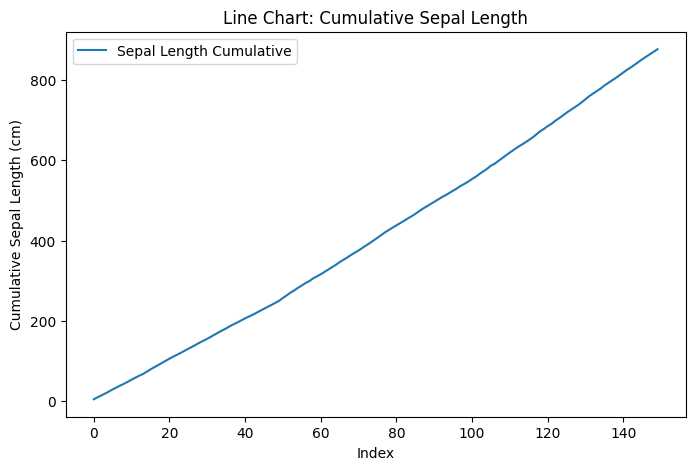

/tmp/ipykernel_85307/693133611.py:77: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='species', y='petal length (cm)', data=df, ci=None, palette='Set2')
/tmp/ipykernel_85307/693133611.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y='petal length (cm)', data=df, ci=None, palette='Set2')


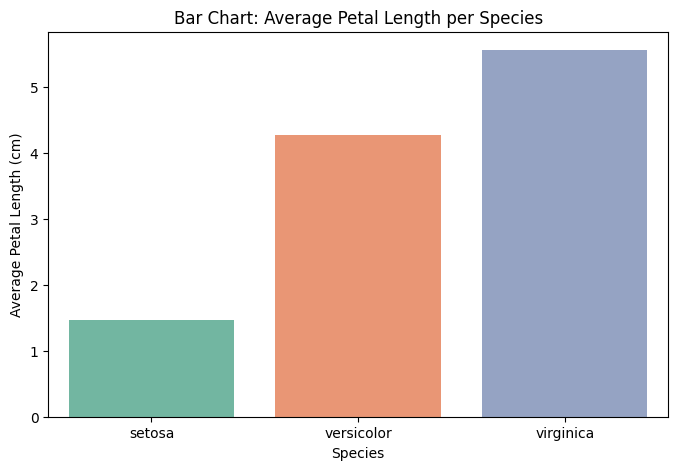

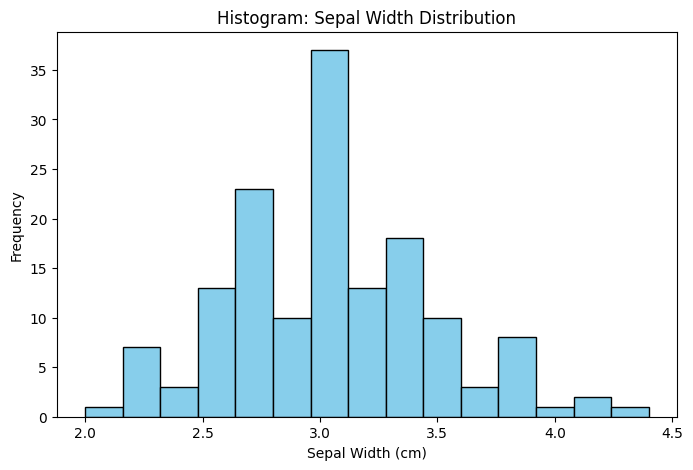

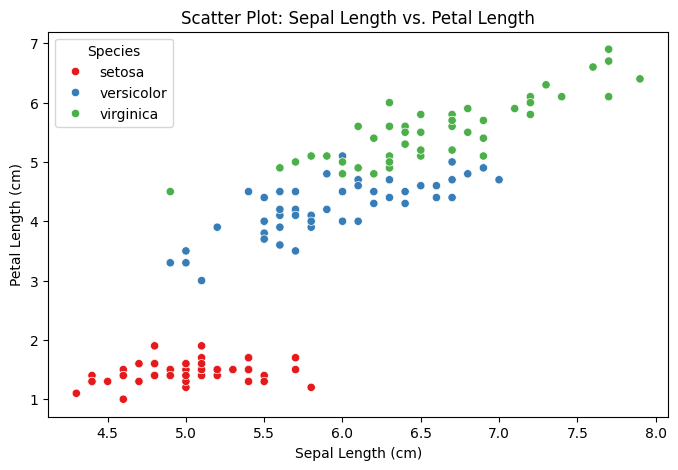


✅ Analysis and visualization complete!


In [1]:
# Analyzing Data with Pandas and Visualizing Results with Matplotlib
# Dataset: Iris

# -----------------------------
# Import required libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

# -----------------------------
# Task 1: Load and Explore the Dataset
# -----------------------------
try:
    # Load the Iris dataset from sklearn
    iris = load_iris(as_frame=True)
    df = iris.frame
    df['species'] = df['target'].map(dict(enumerate(iris.target_names)))
    
    print("✅ Dataset loaded successfully!\n")
except FileNotFoundError:
    print("❌ Error: Dataset file not found.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")

# Display first few rows
print("First 5 rows of dataset:")
display(df.head())

# Check data types and missing values
print("\nDataset info:")
print(df.info())

print("\nMissing values in each column:")
print(df.isnull().sum())

# Clean dataset (if missing values existed, we’d fill/drop them)
df = df.dropna()

# -----------------------------
# Task 2: Basic Data Analysis
# -----------------------------

# Compute descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())

# Group by species and compute mean
print("\nMean values grouped by species:")
grouped_means = df.groupby('species').mean()
display(grouped_means)

# Simple findings
print("\nObservations:")
print("- Iris-virginica generally has the largest petal and sepal sizes.")
print("- Iris-setosa has the smallest petal length and width values.")
print("- Petal length seems to strongly differentiate species.")

# -----------------------------
# Task 3: Data Visualization
# -----------------------------

# 1. Line Chart (for illustration, cumulative sepal length by index)
plt.figure(figsize=(8,5))
plt.plot(df.index, df['sepal length (cm)'].cumsum(), label='Sepal Length Cumulative')
plt.title("Line Chart: Cumulative Sepal Length")
plt.xlabel("Index")
plt.ylabel("Cumulative Sepal Length (cm)")
plt.legend()
plt.show()

# 2. Bar Chart (average petal length per species)
plt.figure(figsize=(8,5))
sns.barplot(x='species', y='petal length (cm)', data=df, ci=None, palette='Set2')
plt.title("Bar Chart: Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.show()

# 3. Histogram (distribution of sepal width)
plt.figure(figsize=(8,5))
plt.hist(df['sepal width (cm)'], bins=15, color='skyblue', edgecolor='black')
plt.title("Histogram: Sepal Width Distribution")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()

# 4. Scatter Plot (sepal length vs. petal length, colored by species)
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='sepal length (cm)', 
    y='petal length (cm)', 
    hue='species', 
    data=df, 
    palette='Set1'
)
plt.title("Scatter Plot: Sepal Length vs. Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()

print("\n✅ Analysis and visualization complete!")
